## First we load the important libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import itertools # use chain method to efficiently flatten list of lists 
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## Reading the data naming the columns and dropping the columns without data 

In [2]:
# header=None --> there are no headers in data
colnames=['user_id','game_title', 'behavior_name','value','temp'] 
users = pd.read_csv("steam-200k.csv",header=None,names=colnames,usecols=['user_id','game_title', 'behavior_name','value'])

In [3]:
pd.set_option('display.max_rows', 500)
users[users.user_id==151603712]

,user_id,game_title,behavior_name,value
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0
5,151603712,Spore,play,14.9
6,151603712,Fallout New Vegas,purchase,1.0
7,151603712,Fallout New Vegas,play,12.1
8,151603712,Left 4 Dead 2,purchase,1.0
9,151603712,Left 4 Dead 2,play,8.9


In [7]:
#remove duplicated purchase
users.drop_duplicates(subset=['user_id','game_title','behavior_name'], keep='first', inplace=True)

In [10]:
# user statistics:
user_games_num = users.game_title.nunique()
user_play_hrs = users[users.behavior_name=='play'].value.sum()
user_play_avg = users[users.behavior_name=='play'].value.mean()
user_play_median = users[users.behavior_name=='play'].value.median()
user_purchase_num = users[users.behavior_name=='purchase'].value.sum()
user_purchase_avg = user_purchase_num / user_games_num

print('number of games played:',user_games_num)
print('number of total hours played: %.2f'%(user_play_hrs))
print('number of avg hours played: %.2f'%(user_play_avg))
print('number of median hours played: %.2f'%(user_play_median))
print('number of purchases: %.0f'%(user_purchase_num))
print('number of purchases per game: %.0f'%(user_purchase_avg))

number of games played: 5155
number of total hours played: 3445346.00
number of avg hours played: 48.89
number of median hours played: 4.50
number of purchases: 128804
number of purchases per game: 25


In [11]:
# every game involves a purchase event

x = users.groupby(['user_id','behavior_name']).count()



In [12]:
# aggregate games by total play hrs / mean play hrs / median play hrs

game_stats = users[users.behavior_name == 'play'].groupby(['game_title']).agg({'value':[np.sum,np.mean,np.median]})

game_stats.columns = ['_'.join(col).strip() for col in game_stats.columns.values] # flatten hierarchy in column multi-index

In [13]:
# top 15 games in total play hrs
game_stats.value_sum.sort_values(ascending=False).head(15)

game_title
Dota 2                                         981684.6
Counter-Strike Global Offensive                322771.6
Team Fortress 2                                173673.3
Counter-Strike                                 134261.1
Sid Meier's Civilization V                      99821.3
Counter-Strike Source                           96075.5
The Elder Scrolls V Skyrim                      70889.3
Garry's Mod                                     49725.3
Call of Duty Modern Warfare 2 - Multiplayer     42009.9
Left 4 Dead 2                                   33596.7
Football Manager 2013                           32308.6
Football Manager 2012                           30845.8
Football Manager 2014                           30574.8
Terraria                                        29951.8
Warframe                                        27074.6
Name: value_sum, dtype: float64

In [14]:
# top 15 games in avg play time
game_stats.value_mean.sort_values(ascending=False).head(15)

game_title
Eastside Hockey Manager              1295.000000
Baldur's Gate II Enhanced Edition     475.255556
FIFA Manager 09                       411.000000
Perpetuum                             400.975000
Football Manager 2014                 391.984615
Football Manager 2012                 390.453165
Football Manager 2010                 375.048571
Football Manager 2011                 365.703226
Freaking Meatbags                     331.000000
Out of the Park Baseball 16           330.400000
Football Manager 2015                 315.364935
Football Manager 2013                 310.659615
FINAL FANTASY XIV A Realm Reborn      300.840909
Worldwide Soccer Manager 2009         295.000000
X-Plane 10 Global - 64 Bit            268.025000
Name: value_mean, dtype: float64

In [15]:
# top 15 games in median play time
game_stats.value_median.sort_values(ascending=False).head(15)

game_title
Eastside Hockey Manager                                1295.00
FIFA Manager 09                                         411.00
Freaking Meatbags                                       331.00
Out of the Park Baseball 16                             330.40
Worldwide Soccer Manager 2009                           295.00
NOBUNAGA'S AMBITION Kakushin with Power Up Kit          267.00
Football Manager 2012                                   247.00
FIFA Manager 11                                         229.00
Avernum 4                                               228.00
MLB 2K10                                                228.00
Avernum 5                                               222.00
Sword of the Stars Complete Collection                  209.55
Cultures - Northland                                    194.00
Silent Hunter Wolves of the Pacific U-Boat Missions     185.00
King's Bounty Dark Side                                 183.00
Name: value_median, dtype: float64

In [16]:
# consider top 10 games from each statistic

a = [game_stats[col].sort_values(ascending=False).head(10).index.tolist() for col in game_stats.columns.values]

top_tens = list(set(itertools.chain.from_iterable(a))) # join top 10 games by each statistic 

top_tens.sort(key=str.casefold) # sort alphabetically

In [17]:
total_playtime = game_stats.loc[top_tens,'value_sum']
mean_playtime = game_stats.loc[top_tens,'value_mean']
median_playtime = game_stats.loc[top_tens,'value_median']

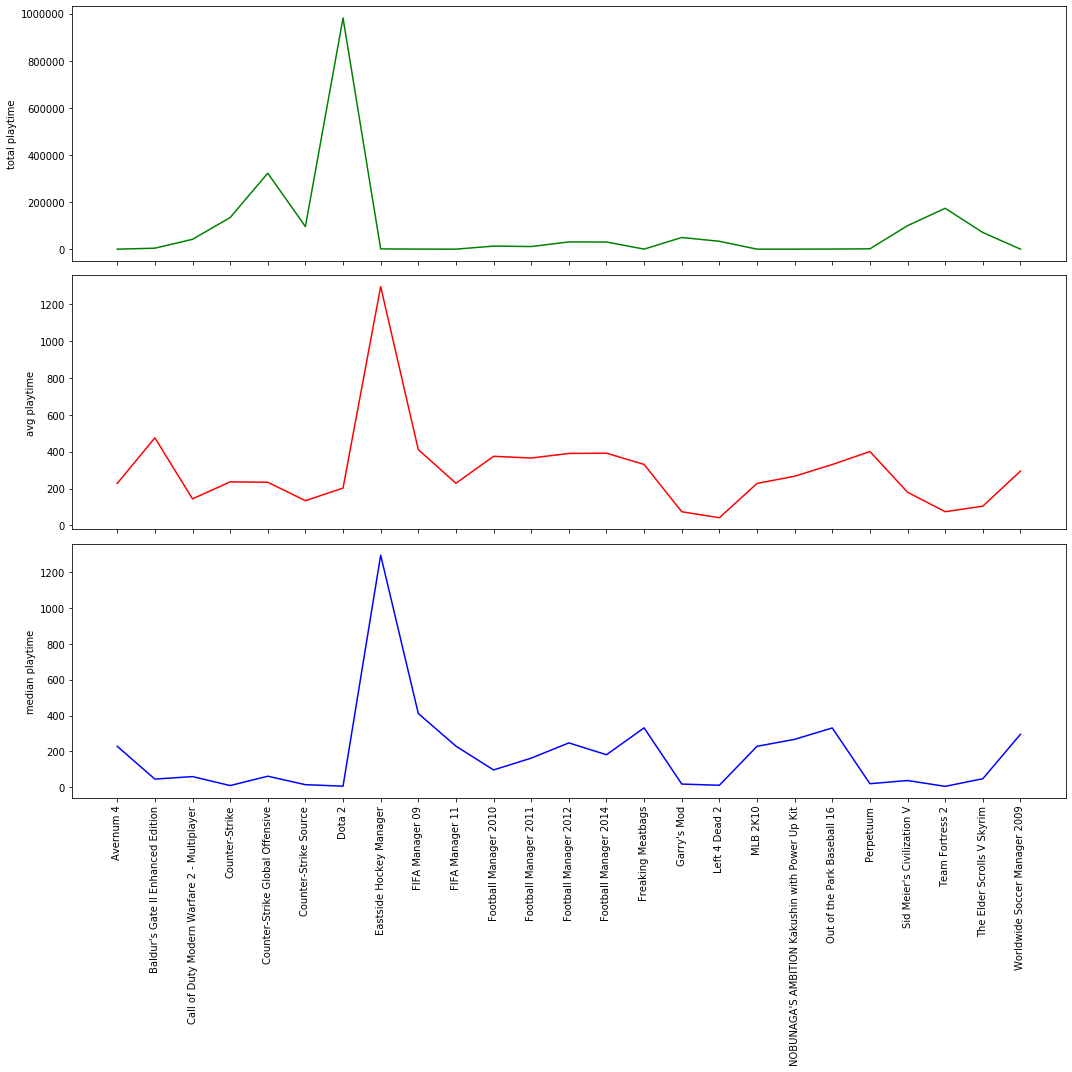

In [18]:
# plot top 10 games for each statistic

plt.figure(figsize=(15,15),facecolor="w")
plt.xticks(rotation='vertical')
ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2,sharex=ax1)
ax3 = plt.subplot(3,1,3,sharex=ax1)
ax1.plot(total_playtime,color='g')
ax2.plot(mean_playtime,color='r')
ax3.plot(median_playtime,color='b')
ax1.set_ylabel('total playtime')
ax2.set_ylabel('avg playtime')
ax3.set_ylabel('median playtime')
# ax2.set_xlabel("x Axis")
plt.setp(ax1.get_xticklabels(),visible=False)
plt.setp(ax2.get_xticklabels(),visible=False)
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=90 )

plt.tight_layout()
plt.show()

# NOTE: we have two clear outliers we might want to treat seperately

In [ ]:
ax = users[users.behavior_name=="purchase"].groupby(['user_id']).count().sort_values(by='value',  axis=0, ascending=False).value.plot.hist(bins=100,figsize=(18,9))
# plt.xlim(2, 200)
ax.set(yscale ='log')
# users.groupby(['user_id']).count().sort_values(self, by, axis=0, ascending=True, inpla)

In [ ]:
ax=users[users.behavior_name=="play"].groupby(['user_id']).sum().sort_values(by='value',  axis=0, ascending=False).value.plot.hist(bins=150,figsize=(18,9))
# plt.xlim(2, 2000)
ax.set(yscale ='log')

### Extract top  games in terms of users.

In [19]:
top_games = users.groupby(['game_title'])['user_id'].count().sort_values(ascending=False)
top_games = top_games/2

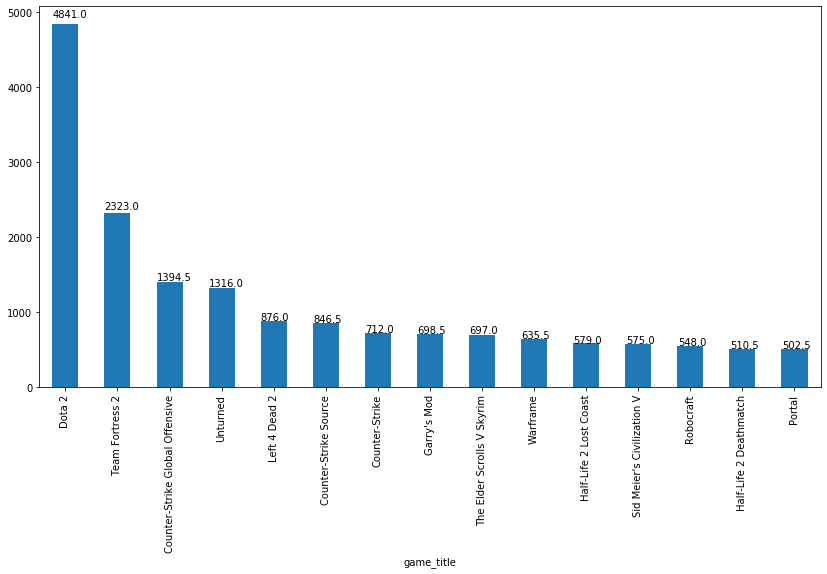

In [20]:
# need to devied by 2 since we have 2 rows for each game we should filter only purchase

ax = top_games[0:15].plot.bar(figsize=(14,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.001, p.get_height() * 1.02))


> ### Filter data for rows with top 10 games only

In [21]:
users = users[users.game_title.isin(top_games[0:10].index)]

In [22]:
users.shape

(28680, 4)

In [23]:
users.user_id.nunique()

8810

### using this technique will allow us to cluster only 8810 out of 12393, There are ~4k users we will not be able to cluster we will deal with it later

In [ ]:
users.game_title.nunique()

### as expected we have 10 games 

### Now we need to remove outliers
I will create a small program that will handle only the numbers and will remove only high values

In [24]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[ (df[name] < quant_df.loc[high, name])]
    return df



In [25]:
#now we need to check the types of the variables in the users
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28680 entries, 0 to 199963
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        28680 non-null  int64  
 1   game_title     28680 non-null  object 
 2   behavior_name  28680 non-null  object 
 3   value          28680 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [26]:
# we need to change the type of the user_id to be string
users.user_id=users.user_id.astype('str')

In [27]:
#now we need to check the types of the variables in the users
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28680 entries, 0 to 199963
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        28680 non-null  object 
 1   game_title     28680 non-null  object 
 2   behavior_name  28680 non-null  object 
 3   value          28680 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [28]:
users = remove_outlier(users)   

In [29]:
users.shape

(27243, 4)

> ### Building the DF (Users) for clustering we need to have one row per user per game that will include the purchase and the play time in one row

In [30]:
from functools import reduce
df = {}

# top 10 games in numbers of users
games = top_games[0:10].index

for i, game in enumerate(games):
    df_purchase = users[(users.game_title == game) & (users.behavior_name == 'purchase')][['user_id','value']]
    df_play = users[(users.game_title == game) & (users.behavior_name == 'play')][['user_id','value']]
    df_game = pd.merge(left = df_purchase, right = df_play, how = 'left', on = ['user_id'], suffixes= ('_purchase','_playtime'))
    df_game.rename(columns={'value_purchase':'purchase_'+str(i),'value_playtime':'playtime_'+str(i)},inplace=True)
    df[game] = df_game

df_final = reduce(lambda left,right: pd.merge(left,right,how='outer',on=['user_id'],suffixes=('',''),sort=False), df.values())

df_final.fillna(value=0,inplace=True)


In [31]:
df_final.head()

,user_id,purchase_0,playtime_0,purchase_1,playtime_1,purchase_2,playtime_2,purchase_3,playtime_3,purchase_4,...,purchase_5,playtime_5,purchase_6,playtime_6,purchase_7,playtime_7,purchase_8,playtime_8,purchase_9,playtime_9
0,151603712,1.0,0.5,1.0,2.8,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.1,1.0,273.0,0.0,0.0
1,187131847,1.0,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,176410694,1.0,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,197278511,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,197455089,1.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## we need to scale since the values of the value might be very high

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


df_final_scale = scaler.fit_transform(df_final)

df_final_scale = pd.DataFrame(df_final_scale,columns = df_final.columns)


In [33]:
df_final_scale

,user_id,purchase_0,playtime_0,purchase_1,playtime_1,purchase_2,playtime_2,purchase_3,playtime_3,purchase_4,...,purchase_5,playtime_5,purchase_6,playtime_6,purchase_7,playtime_7,purchase_8,playtime_8,purchase_9,playtime_9
0,0.489188,1.0,0.001534,1.0,0.00875,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.000319,1.0,0.84,0.0,0.0
1,0.603833,1.0,0.007055,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
2,0.569237,1.0,0.027914,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
3,0.636575,1.0,0.001534,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
4,0.637145,1.0,0.010429,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,0.518647,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0
8806,0.777598,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0
8807,0.711295,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0
8808,0.951105,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0


## Clustering set up

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
import time
from pandas.plotting import scatter_matrix
%matplotlib inline
sns.set_context('talk')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [35]:
k = 5
model = KMeans(n_clusters=k, 
               max_iter=10, random_state=1, 
               init='k-means++', n_init=10)
df_final_scale['cluster'] = pd.Series(model.fit_predict(df_final_scale))

In [36]:
model.labels_

array([2, 0, 0, ..., 4, 4, 4], dtype=int32)

In [37]:
model.cluster_centers_

array([[ 6.26563090e-01,  1.00000000e+00,  7.03199433e-02,
        -2.43693954e-14,  6.38378239e-16,  3.34739062e-02,
         5.13466607e-03, -2.88657986e-15, -3.22658567e-16,
         1.79230364e-02,  5.65057238e-04,  5.79862941e-03,
         8.55402945e-04,  1.02793885e-02,  1.17961827e-03,
         2.63574064e-03,  2.17680178e-04,  9.48866632e-03,
         2.03316978e-03,  4.24354244e-02,  8.97283732e-04],
       [ 6.53681994e-01,  2.53872633e-01,  2.86651426e-02,
         2.47848537e-01,  1.58713425e-02,  1.33390706e-01,
         2.47755859e-02,  1.00000000e+00,  2.48644226e-02,
         3.44234079e-02,  1.81200994e-03,  1.20481928e-02,
         3.61392986e-04,  6.88468158e-03,  9.23099406e-04,
         7.57314974e-02,  7.86981793e-03,  3.35628227e-02,
         6.50708328e-03,  1.67814114e-01,  2.92018204e-03],
       [ 3.35404751e-01,  6.88679245e-01,  5.21195410e-02,
         8.36927224e-01,  9.51516173e-02,  8.63881402e-01,
         1.33348953e-01,  5.33692722e-01,  2.25336927e

In [38]:
def calc_inertia(k):
    model = KMeans(n_clusters=k).fit(df_final_scale)
    return model.inertia_

inertias = [(k, calc_inertia(k)) for k in range(1, 10)]

Text(0.25, 0.4, '*K=2 is too small')

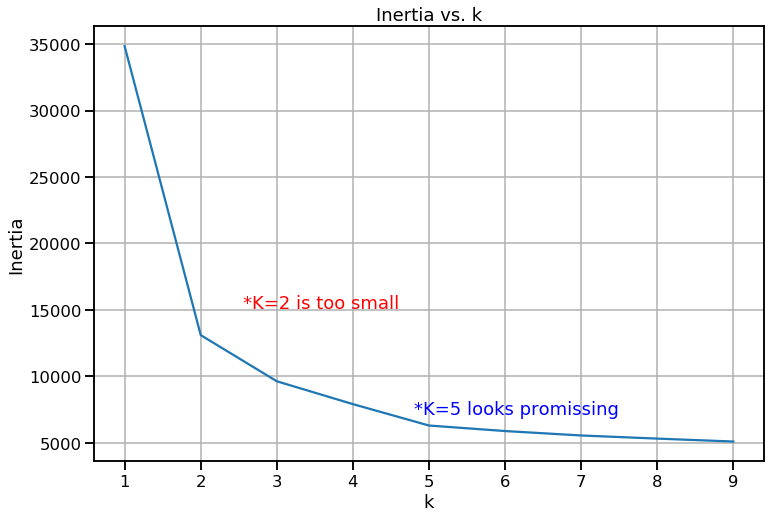

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(*zip(*inertias))
plt.title('Inertia vs. k')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.grid(True)
plt.text(0.5, 0.120, '*K=5 looks promissing', horizontalalignment='center',verticalalignment='center',color='blue', transform=ax.transAxes)
plt.text(0.25, 0.4, '*K=2 is too small', horizontalalignment='center',verticalalignment='center',color='red', transform=ax.transAxes)

In [40]:
# data[['user_id','value_y','cluster']]
# scatter = scatter_matrix(data[['user_id','value_y','cluster']] ,figsize=(15, 10), s=22 ,alpha=1)
if 'cluster' in df_final_scale.columns:
    df_final_scale.drop(['cluster'], axis=1,inplace=True)
k = 5
model = KMeans(n_clusters=k, 
               max_iter=10, random_state=1, 
               init='k-means++', n_init=10)
df_final_scale['cluster'] = pd.Series(model.fit_predict(df_final_scale))




In [41]:
df_final_scale.cluster.value_counts()

0    3793
4    1703
3    1410
1    1162
2     742
Name: cluster, dtype: int64

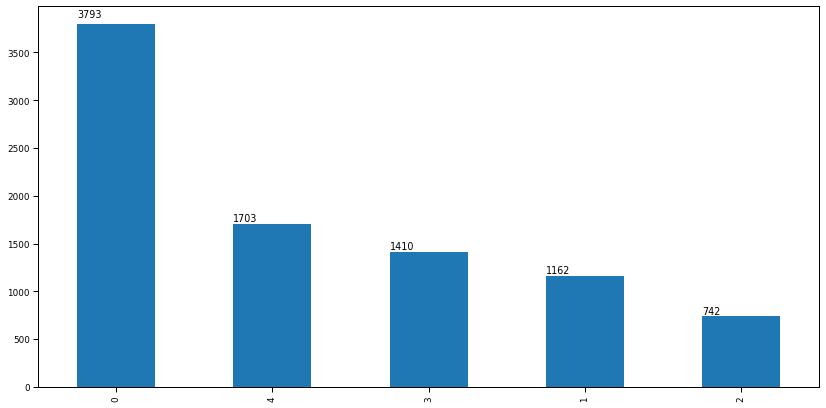

In [42]:
sns.set_context('paper')
ax = df_final_scale.cluster.value_counts().plot.bar(figsize=(14,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.001, p.get_height() * 1.02))

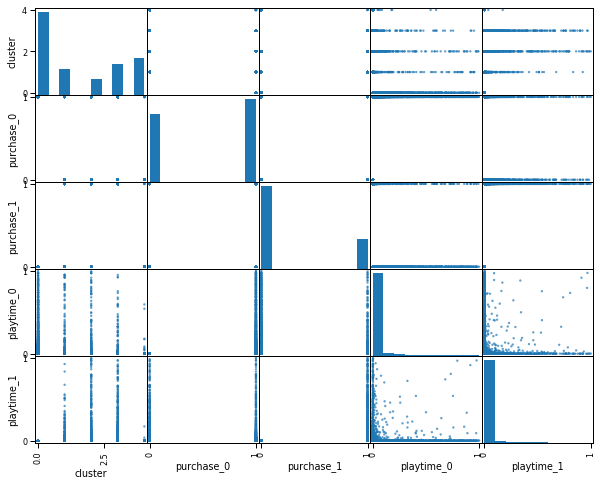

In [43]:
sns.set_context('paper')
data = df_final_scale[['cluster','purchase_0','purchase_1','playtime_0','playtime_1']]
scatter = scatter_matrix(data ,figsize=(10, 8), s=22 ,alpha=.7)
sns.set_context('talk')

In [44]:
df_final_scale

,user_id,purchase_0,playtime_0,purchase_1,playtime_1,purchase_2,playtime_2,purchase_3,playtime_3,purchase_4,...,playtime_5,purchase_6,playtime_6,purchase_7,playtime_7,purchase_8,playtime_8,purchase_9,playtime_9,cluster
0,0.489188,1.0,0.001534,1.0,0.00875,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.000319,1.0,0.84,0.0,0.0,2
1,0.603833,1.0,0.007055,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0
2,0.569237,1.0,0.027914,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0
3,0.636575,1.0,0.001534,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0
4,0.637145,1.0,0.010429,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,0.518647,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0,4
8806,0.777598,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0,4
8807,0.711295,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0,4
8808,0.951105,0.0,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.0,0.0,4


In [45]:
for i in df_final_scale.cluster.unique():
    print("this is the statistics for cluster ",i)
    print(df_final_scale[df_final_scale.cluster==i].describe())

this is the statistics for cluster  2
          user_id  purchase_0  playtime_0  purchase_1  playtime_1  purchase_2  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean     0.335259    0.687332    0.052120    0.836927    0.095165    0.862534   
std      0.197293    0.463893    0.160360    0.369681    0.191819    0.344571   
min      0.000948    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.177803    0.000000    0.000000    1.000000    0.000078    1.000000   
50%      0.324333    1.000000    0.000460    1.000000    0.011562    1.000000   
75%      0.488900    1.000000    0.011963    1.000000    0.084375    1.000000   
max      0.970330    1.000000    0.993865    1.000000    1.000000    1.000000   

       playtime_2  purchase_3  playtime_3  purchase_4  ...  playtime_5  \
count  742.000000  742.000000  742.000000  742.000000  ...  742.000000   
mean     0.133305    0.533693    0.022531    0.634771  ...    0.039490   
std      0

           user_id   purchase_0   playtime_0   purchase_1   playtime_1  \
count  1703.000000  1703.000000  1703.000000  1703.000000  1703.000000   
mean      0.346579     0.011744     0.001081     0.002349     0.000125   
std       0.286509     0.107763     0.020718     0.048422     0.004257   
min       0.000231     0.000000     0.000000     0.000000     0.000000   
25%       0.097079     0.000000     0.000000     0.000000     0.000000   
50%       0.256436     0.000000     0.000000     0.000000     0.000000   
75%       0.561199     0.000000     0.000000     0.000000     0.000000   
max       0.996744     1.000000     0.595092     1.000000     0.171875   

        purchase_2   playtime_2   purchase_3   playtime_3   purchase_4  ...  \
count  1703.000000  1703.000000  1703.000000  1703.000000  1703.000000  ...   
mean      0.240164     0.034462     0.002936     0.000007     0.157369  ...   
std       0.427309     0.127619     0.054121     0.000286     0.364256  ...   
min       0.00000

## Hdbscan Clustering

In [ ]:
pip install hdbscan

In [ ]:
import hdbscan

In [ ]:
if 'cluster' in df_final_scale.columns:
    df_final_scale.drop(['cluster'], axis=1,inplace=True)
clusterer = hdbscan.HDBSCAN(min_cluster_size=200)
cluster_labels = clusterer.fit_predict(df_final_scale)

In [ ]:
cluster_labels 

In [ ]:
df_final_scale['cluster'] = cluster_labels

In [ ]:
df_final_scale

In [ ]:
df_final_scale.cluster.value_counts()

In [ ]:
sns.set_context('paper')
ax = df_final_scale.cluster.value_counts().plot.bar(figsize=(14,7))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.001, p.get_height() * 1.02))

In [ ]:
df_final_scale[df_final_scale.cluster==5]

In [ ]:
df_final_scale[df_final_scale.cluster==5].describe()

In [ ]:
for i in df_final_scale.cluster.unique():
    print("this is the statistics for cluster ",i)
    print(df_final_scale[df_final_scale.cluster==i].describe())

## Agglomerative Clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
if 'cluster' in df_final_scale.columns:
    df_final_scale.drop(['cluster'], axis=1,inplace=True)
Z = linkage(df_final_scale, method='ward', metric='euclidean')

In [ ]:
dn = dendrogram(Z)

In [ ]:
df_final_scale['cluster'] = fcluster(Z, 5, criterion='maxclust')
df_final_scale.plot('playtime_0', 'playtime_1', kind='scatter', c=df_final_scale['cluster'], s=100)

In [ ]:
for i in df_final_scale.cluster.unique():
    print("this is the statistics for cluster ",i)
    print(df_final_scale[df_final_scale.cluster==i].describe())